In [2]:
import warnings
import requests
warnings.filterwarnings('ignore')


from pathlib import Path
import sys, os
from io import BytesIO
from zipfile import ZipFile, BadZipFile

import numpy as np
import pandas as pd


from numpy.random import choice, normal

import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from matplotlib.ticker import FuncFormatter

from sklearn.datasets import fetch_openml




from matplotlib import cm
from itertools import product

import time
from datetime import datetime, timedelta
import plotly.io as pio
import plotly.express as px

import talib

#import gtts
#from playsound import playsound


from scipy.stats import spearmanr
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error, explained_variance_score, roc_curve, make_scorer, roc_auc_score, mean_absolute_error, recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, _tree
from sklearn import tree
from sklearn.ensemble import BaggingRegressor, RandomForestClassifier, RandomForestRegressor, AdaBoostRegressor, AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor, VotingClassifier


pd.set_option('display.expand_frame_repr', False)

sns.set_style('whitegrid')
idx = pd.IndexSlice

pd.options.display.max_rows = 500

In [87]:
url = 'https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/HW_linear_regression/data/gauss_R2.csv'
df = pd.read_csv(url, header=None)
df = df.rename(columns={0:"X", 1:"Y"})
data = df[1:]
data['X'] = data['X'].astype('float64')
data['Y'] = data['Y'].astype('float64')

In [88]:
data['Y-X'] = data['Y'] - data['X']
data

,X,Y,Y-X
1,-0.110299,0.252064,0.362363
2,2.053240,-0.324025,-2.377266
3,0.337560,-0.027456,-0.365015
4,0.371276,0.425773,0.054497
5,-0.092864,-0.369919,-0.277055
...,...,...,...
996,-1.285877,0.277068,1.562945
997,0.149209,0.350022,0.200812
998,-0.094531,0.434381,0.528912
999,0.087508,1.292354,1.204846


In [92]:
spearmanr(data['X'], data['Y-X'])

SpearmanrResult(correlation=-0.6965811365811366, pvalue=4.527131826179081e-146)

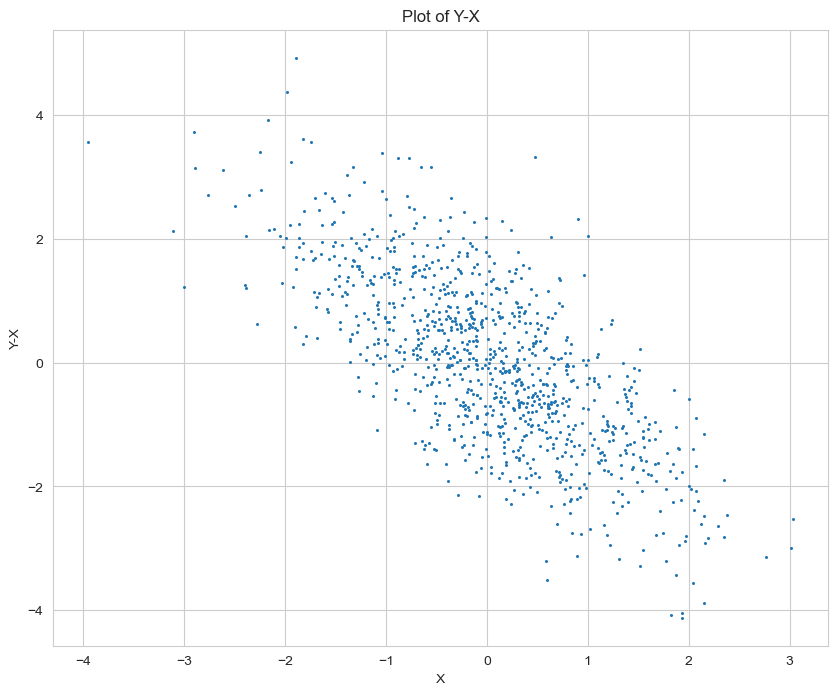

In [32]:
HW = data
ax= HW.plot(kind='scatter',s=1.4,x="X",y="Y-X",figsize=[10,8], title="Plot of Y-X");

In [72]:
X = data['X'].values
y = data['Y'].values

y2 = data['Y-X'].values

In [73]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
y2 = y2.reshape(-1, 1)

In [74]:
lr = LinearRegression()


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01,
                                                    random_state=0)

In [75]:
lr.fit(X, y2)

LinearRegression()

In [86]:
spearmanr(X, y)

SpearmanrResult(correlation=-0.004087996087996088, pvalue=0.8972685194508216)

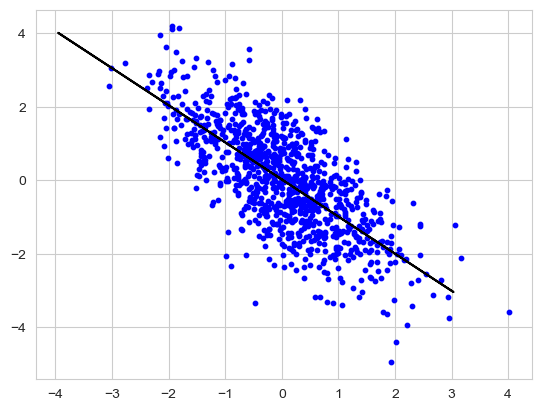

In [85]:
plt.scatter(lr.predict(X), lr.predict(y2), s=10, color='blue')
plt.plot(X,lr.predict(X), color='black')